In [29]:
!pip install nltk

In [3]:
!pip install umap-learn

     |████████████████████████████████| 80 kB 141 kB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 317 kB/s eta 0:00:01     |████████████████▌               | 583 kB 233 kB/s eta 0:00:03     |█████████████████               | 604 kB 233 kB/s eta 0:00:03
  Created wheel for umap-learn: filename=umap_learn-0.5.1-py3-none-any.whl size=76566 sha256=d8bbb4d38ee8576a72c16614e896136ff2cda729bc5b7f8b8d8479fdbbd3367b
  Stored in directory: /Users/oooyyyzzz/Library/Caches/pip/wheels/95/85/b7/b4b7040e49367b6d1505d7e8fb57e3e79b22fa6ac26f72520b
  Created wheel for pynndescent: filename=pynndescent-0.5.4-py3-none-any.whl size=52372 sha256=8163e5390f6e768131b58c62c9942c91c307aa6701b5e313745f6ece36d8339e
  Stored in directory: /Users/oooyyyzzz/Library/Caches/pip/wheels/c7/0d/f8/e89d09e0c7419141e444bd59072cc195df4a88785c1052834b
Successfully built umap-learn pynndescent


In [5]:
import gensim
import pandas as pd
import numpy as np
import sklearn
import spacy

/Users/oooyyyzzz/opt/anaconda3/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [30]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/oooyyyzzz/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Error with downloaded zip file


False

In [9]:
!pip3 install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-2.2.0.tar.gz


     |████████████████████████████████| 12.0 MB 3.6 MB/s eta 0:00:01    |██████▏                         | 2.3 MB 402 kB/s eta 0:00:25
  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.2.0-py3-none-any.whl size=12019123 sha256=7f7a4b96f031b9bf159fa6b8420113537da65aa078ec55a1d721b64722f23c98
  Stored in directory: /Users/oooyyyzzz/Library/Caches/pip/wheels/fc/31/e9/092e6f05b2817c9cb45804a3d1bf2b9bf6575742c01819337c
Successfully built en-core-web-sm


In [16]:
!python3 -m spacy download en_core_web_sm


     |████████████████████████████████| 13.6 MB 944 kB/s eta 0:00:01
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 2.2.0
    Uninstalling en-core-web-sm-2.2.0:
      Successfully uninstalled en-core-web-sm-2.2.0
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [5]:
import en_core_web_sm
nlp = en_core_web_sm.load()

In [18]:
import warnings
warnings.filterwarnings('ignore')

# Scrap text from urls

In [19]:
url = 'https://neweralive.na/posts/ohangwena-plagued-by-domestic-violence'

In [20]:
from newspaper import Article

In [22]:
article = Article(url)
article.download()

In [23]:
article.html

'<!DOCTYPE html><!--[if lt IE 7 ]><html class="ie ie6" lang="en"><![endif]--><!--[if IE 7 ]><html class="ie ie7" lang="en"><![endif]--><!--[if IE 8 ]><html class="ie ie8" lang="en"><![endif]--><!--[if (gte IE 9)|!(IE)]><!--><html lang="en" prefix="og: http://ogp.me/ns#"><!--<![endif]--><head>\n<link rel="dns-prefetch" href="//ogp.me">\n<link rel="dns-prefetch" href="//fonts.googleapis.com">\n<link rel="dns-prefetch" href="//cdnjs.cloudflare.com">\n<link rel="dns-prefetch" href="//neweralive.na">\n<link rel="dns-prefetch" href="//www.googletagmanager.com">\n<link rel="dns-prefetch" href="//epaper.neweralive.na">\n<link rel="dns-prefetch" href="//rdf.data-vocabulary.org">\n<link rel="dns-prefetch" href="//connect.facebook.net">\n<link rel="dns-prefetch" href="//twitter.com">\n<link rel="dns-prefetch" href="//platform.twitter.com">\n<link rel="dns-prefetch" href="//www.youtube.com">\n<link rel="dns-prefetch" href="//forecast7.com">\n<link rel="dns-prefetch" href="//weatherwidget.io">\n<li

In [24]:
article.parse()

In [32]:
text = article.text
text

'The Ohangwena region has during the last year witnessed an increase in domestic violence cases, reporting a massive 252 cases, compared to 71 in 2019.\n\nGovernor Walde Ndevashiya said it is disheartening to report that the region’s crime has increased to 4 912 cases reported last year.\n\nPresenting the state of affairs in the region, Ndevashiya said drug dealing cases also increased from 51 to 86, murder cases increased from 24 to 29 while robbery also increased from 96 to 129 cases during the last financial year.\n\n“The above statistics are worrisome, hence requires all of us to join hands in the fight against these social evils,” said Ndevashiya.\n\nThe governor said crime does not only undermine the developmental agenda in a number of ways, but it also erodes social and human capital and it also forces skilled people to migrate, leaving the region brain drained.\n\nDespite these challenges, the governor said the Namibian Police are committed to the provision of safety and securi

# Text Processing
## Tokenization

In [33]:
from spacy.symbols import ORTH

In [38]:
doc = nlp(text)  # phrase to tokenize
token_lst = [w.text for w in doc]

print(token_lst)

['The', 'Ohangwena', 'region', 'has', 'during', 'the', 'last', 'year', 'witnessed', 'an', 'increase', 'in', 'domestic', 'violence', 'cases', 'reporting', 'a', 'massive', '252', 'cases', 'compared', 'to', '71', 'in', '2019', '\n\n', 'Governor', 'Walde', 'Ndevashiya', 'said', 'it', 'is', 'disheartening', 'to', 'report', 'that', 'the', 'region', '’s', 'crime', 'has', 'increased', 'to', '4', '912', 'cases', 'reported', 'last', 'year', '\n\n', 'Presenting', 'the', 'state', 'of', 'affairs', 'in', 'the', 'region', 'Ndevashiya', 'said', 'drug', 'dealing', 'cases', 'also', 'increased', 'from', '51', 'to', '86', 'murder', 'cases', 'increased', 'from', '24', 'to', '29', 'while', 'robbery', 'also', 'increased', 'from', '96', 'to', '129', 'cases', 'during', 'the', 'last', 'financial', 'year', '\n\n', 'The', 'above', 'statistics', 'are', 'worrisome', 'hence', 'requires', 'all', 'of', 'us', 'to', 'join', 'hands', 'in', 'the', 'fight', 'against', 'these', 'social', 'evils', 'said', 'Ndevashiya', '\n\n

### Remove noisy words

In [43]:
# Remove noisy words

#define some parameters  
noisy_pos_tags = ["\n\n"] 
min_token_length = 2


#Function to check if the token is a noise or not  
def isNoise(token):     
    is_noise = False
    if token.pos_ in noisy_pos_tags:
        is_noise = True 
    elif token.is_stop:
        is_noise = True
    elif token.is_punct:
        is_noise = True
    elif len(token.text) <= min_token_length:
        is_noise = True
    return is_noise


def cleanup(token, lower = True):
    if lower:
        token = token.lower()
    return token.strip()


cleaned_lst = [cleanup(w.text) for w in doc if not isNoise(w)]
print(cleaned_lst)

['ohangwena', 'region', 'year', 'witnessed', 'increase', 'domestic', 'violence', 'cases', 'reporting', 'massive', '252', 'cases', 'compared', '2019', 'governor', 'walde', 'ndevashiya', 'said', 'disheartening', 'report', 'region', 'crime', 'increased', '912', 'cases', 'reported', 'year', 'presenting', 'state', 'affairs', 'region', 'ndevashiya', 'said', 'drug', 'dealing', 'cases', 'increased', 'murder', 'cases', 'increased', 'robbery', 'increased', '129', 'cases', 'financial', 'year', 'statistics', 'worrisome', 'requires', 'join', 'hands', 'fight', 'social', 'evils', 'said', 'ndevashiya', 'governor', 'said', 'crime', 'undermine', 'developmental', 'agenda', 'number', 'ways', 'erodes', 'social', 'human', 'capital', 'forces', 'skilled', 'people', 'migrate', 'leaving', 'region', 'brain', 'drained', 'despite', 'challenges', 'governor', 'said', 'namibian', 'police', 'committed', 'provision', 'safety', 'security', 'terms', 'creating', 'conducive', 'working', 'environment', 'men', 'women', 'unif

### Find most common words

In [44]:
import collections

In [46]:
# top words used in the text 
from collections import Counter
Counter(cleaned_lst).most_common(10)

[('cases', 6),
 ('region', 5),
 ('said', 5),
 ('increased', 4),
 ('police', 4),
 ('quarters', 4),
 ('year', 3),
 ('governor', 3),
 ('ndevashiya', 3),
 ('crime', 3)]

## Entity Detection


In [50]:
labels = set([w.label_ for w in doc.ents]) 
for label in labels: 
    entities = [cleanup(e.text, lower=False) for e in doc.ents if label==e.label_] 
    entities = list(set(entities)) 
    print (label,entities)

GPE ['Eenhana', 'Ongha']
ORG ['Walde Ndevashiya', 'Endola', 'Ndevashiya', 'the Namibian Police']
DATE ['2019', 'last year', 'the last year', 'the last financial year']
CARDINAL ['51 to 86', '24', '4 912', '129', '71', '252', '96']
NORP ['Ohangwena']


In [51]:
from spacy import displacy
displacy.render(doc, style='ent', jupyter=True)

### Functions for entity detection

In [89]:
import warnings
import gensim
import pandas as pd
import numpy as np
import sklearn
import spacy
import nltk
import en_core_web_sm
import wordcloud
from spacy.symbols import ORTH
from collections import Counter
from spacy import displacy
import matplotlib.pyplot as plt

nltk.download('punkt')
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /Users/oooyyyzzz/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [87]:
NOISY_POS_TAG = ["\n\n"] 
MIN_TOKEN_LENGTH = 2

def tokenize_text(text):
    '''
    With given text, return a list of tokenized words after removing noisy words

    Input:
      text: string
    Output:
      doc: a Spacy Doc object
      token_lst: list of tokenized words 
    '''
    nlp = en_core_web_sm.load()
    doc = nlp(text)
    token_lst = [cleanup(w.text) for w in doc if not isNoise(w)]
    return doc, token_lst


def isNoise(token):
    '''
    Check if a specific token is a noisy one
    Input:
      token: string
    Output:
      is_noise: boolean
    '''
    is_noise = False
    if token.pos_ in NOISY_POS_TAG:
        is_noise = True 
    elif token.is_stop:
        is_noise = True
    elif token.is_punct:
        is_noise = True
    elif len(token.text) <= MIN_TOKEN_LENGTH:
        is_noise = True
    return is_noise


def cleanup(token, lower = True):
    '''
    Clean up a specific token
    Input:
      token: string
    Output:
      string
    '''
    if lower:
        token = token.lower()
    return token.strip()


def find_common_token(text):
    '''
    Find most common token with given text
    Input:
      text: string
    Output:
      common_word_lst: list of tuples (token, times)
    '''
    token_lst = tokenize_text(text)
    common_word_lst = Counter(cleaned_lst).most_common(10)
    return common_word_lst


def detect_entity(doc):
    '''
    Detect entities with given document
    Input:
      doc: a Spacy Doc object
    Output:
      entity_dict: dictionary of entities
    '''
    entity_dict = {}
    labels = set([w.label_ for w in doc.ents]) 
    for label in labels: 
        entities = [cleanup(e.text, lower=False) for e in doc.ents if label==e.label_] 
        entities = list(set(entities)) 
        entity_dict[label] = entities
    return entity_dict


def display_entity(doc):
    '''
    Detect entities with given document
    Input:
      doc: a Spacy Doc object
    '''
    displacy.render(doc, style='ent', jupyter=True)
    
    
def draw_word_cloud(text):
    '''
    '''
    wc = wordcloud.WordCloud(background_color="white", max_words=500, width= 1000, height = 1000, mode ='RGBA', scale=.5).generate(text)
    plt.imshow(wc)
    plt.axis("off")
    plt.savefig("whitehouse_word_cloud.pdf", format = 'pdf')

In [67]:
# trial
text = 'Laurent Gbagbo at the courtroom during a hearing on his request for unconditional release in The Hague on 2 February 2020.\n\nJudges at the International Criminal Court (ICC) on Thursday dismissed an appeal against Côte d’Ivoire’s former President Laurent Gbagbo, confirming his acquittal for crimes against humanity and paving the way for his return to the West African country after almost a decade.The decision was a blow for victims\' families and provoked concern among observers who say the case highlights the need for serious reform within the court system.\n\nAdvertising Read more\n\n“This is a victory for a man, President Gbagbo, whose innocence is finally fully recognised,” said Gbagbo’s lawyer Emmanuel Altit. “President Gbagbo always said that he believed in justice. Today, justice has been done.”\n\nGbagbo and his right-hand man Charles Blé Goudé were found not guilty of crimes against humanity in 2019 related to post-election violence in Côte d’Ivoire more than 10 years ago. Some 3,000 people were killed following disputed results in the 2010 polls.\n\nGbagbo refused to cede power to incumbent President Alassane Ouattara, but with the help of a French military intervention he was removed from the presidency. He was sent to the world court the next year.\n\nICC prosecutor Fatou Bensouda appealed the 15 January 2019 decision, arguing that the court “committed legal and procedural errors”, highlighting that judges did not make a proper written judgement until six months after an oral acquittal.\n\nBensouda had said Gbagbo and Blé Goudé’s acquittal must be reversed and must be declared a mistrial, saying the judges did not apply a “clearly defined standard of proof” in reviewing the evidence.\n\n“I’m not surprised, the trial judgement had been quite clear and conclusive on the fact that the prosecutor had not presented enough evidence or evidence that was convincing enough,” said Mariana Pena, who has been following the trial for the Open Society Justice Initiative, a non-governmental organisation.\n\nMore than 4,600 documents were examined and 96 witnesses appeared on the stand during the trial of the first former head of state to sit in the dock at The Hague court.\n\nPart of the prosecution’s appeal relied on an argument about a claimed procedural error when the original verdict was handed down in 2019, with the prosecutors office saying judges did not make a proper written judgement.\n\n“I think the reason the prosecution appealed on those procedural grounds is because that they’re seeking to establish jurisprudence for the way forward,” legal expert Pena told RFI, explaining that this was probably a move by Bensouda to try and establish a standard for how judgments are delivered.\n\nICC reforms\n\nAnother key tenet of the prosecutors appeal was how the judges set standards for the evidence against Gbagbo and youth wing leader Blé Goudé.\n\nThe appeal verdict served to further underline the need for reforms to the ICC, a process that has already started since the original verdict, according to Pena, who has previously represented victims at the ICC.\n\n“The damage of the acquittal has been done,” she said, describing how the 2019 verdict, in part, encouraged many stakeholders to push for change, especially on questions about the prosecutor providing sufficient evidence.\n\n“Things need to change in terms of how investigations are conducted,” Pena added, outlining specific criticism about how in-country investigation teams operate, an aspect already identified in the review process.\n\nSome criticism has been levelled at ICC Prosecutor Bensouda herself, who will soon be replaced by incoming prosecutor Karim Khan, a British barrister.\n\nNevertheless, Pena points to some successes achieved by the Gambian lawyer, such as the conviction of Congolese warlord Bosco Ntaganda, who’s conviction was confirmed earlier this week.\n\n“I think it’s not just about the person who leads,” said the Argentine lawyer, referring to a resistance to change within the ICC that also comes from other senior management and staff.\n\nSearch for justice\n\nThe need for change at the ICC will not be much comfort to the families of the victims, as the confirmation of Gbagbo and Blé Goudé’s acquittal means they are still seeking justice.\n\n“The court has held no one responsible for atrocity crimes committed during this period,” said Michele Eken, a researcher for Amnesty International, a human rights organisation.\n\nEken referred to an amnesty granted by President Ouattara in 2018 to some 800 people preventing national tribunals from prosecuting crimes under international law.\n\n“Whether at the national or international level, victims of the 2010-2011 violence are yet to see justice and reparations for the harm they suffered,” Amnesty’s Eken said in a statement.\n\nThe appeals verdict also removes one of the last obstacles preventing Gbagbo’s return to Côte d’Ivoire. The former president has been quite clear in expressing his desire to return home.\n\nBut the 75-year-old remains a symbol of the polarised nature of Ivorian politics, split between two camps with divisions that were laid bare during the civil war that broke out in 2002 and later during the electoral crisis in October 2010 when Gbagbo refused to step down.\n\nGbagbo’s return\n\nIncumbent Ouattara, who was recently re-elected for a third term, has been talking about national reconciliation over the past few years, according to Oumar Ba, a political expert at Morehouse College in Atlanta, Georgia, yet a number of issues are outstanding on the modalities surrounding Gbagbo’s homecoming.\n\n"It\'s unclear yet what the effect of this acquittal will mean for Côte d\'Ivoire political scene and the national reconciliation project,” Ba told RFI.\n\nWhile Gbagbo was locked up in Scheveningen prison during the ICC case, Ivorian authorities in January 2018 found him guilty of raiding the national branch of the Central Bank of the States of West Africa and several commercial banks during the post-electoral crisis, with a 20 year prison sentence still hanging over his head.\n\nThis conviction is likely to be at the centre of negotiations surrounding his homecoming, according to Ba, who has published a book on the politics of the ICC.\n\n"I don\'t think that Ouattara is right now in a position to put Gbagbo in prison if he returns, that would create a lot more problems for Ouattara\'s government," said Ba, talking about bargaining between the two camps.\n\nPolitical evolution\n\nIvorian authorities have indeed signaled that they are open to the former president’s return, but the possibility of granting Gbagbo an amnesty is likely to centre on what Gbagbo intends to do next, according to Ba.\n\n"The terms of this return will be a matter of negotiation between the Ivorian authorities, the government and Gbagbo\'s side, what offer could they make for him to be able return safely and not face a prison sentence," he added.\n\nDoes Gbagbo still have political ambitions or does he see himself in an elder statesman type role, questions Ba, who also works as an editor for Africa Is A Country. And how will his return factor into a changing dynamic within Ivorian politics.\n\n"At this point, what will matter the most for Côte d\'Ivoire in the years to come, are not necessarily Ouattara, Gbagbo and [former President Henri Konan] Bedie, but it will more likely be the two younger ones, the new generation," said Ba.\n\nCôte d’Ivoire is likely to see reshuffling of alliances with Gbagbo ally Blé Goudé, as well as Guillaume Soro, previously a key ally of Ouattara, who set up his own opposition party and is now in exile, playing an increasingly important role.\n\nNational reconciliation will “all depend on Gbagbo\'s ability to return back home", said Ba.\n\nDaily newsletterReceive essential international news every morning Subscribe'

In [68]:
text

'Laurent Gbagbo at the courtroom during a hearing on his request for unconditional release in The Hague on 2 February 2020.\n\nJudges at the International Criminal Court (ICC) on Thursday dismissed an appeal against Côte d’Ivoire’s former President Laurent Gbagbo, confirming his acquittal for crimes against humanity and paving the way for his return to the West African country after almost a decade.The decision was a blow for victims\' families and provoked concern among observers who say the case highlights the need for serious reform within the court system.\n\nAdvertising Read more\n\n“This is a victory for a man, President Gbagbo, whose innocence is finally fully recognised,” said Gbagbo’s lawyer Emmanuel Altit. “President Gbagbo always said that he believed in justice. Today, justice has been done.”\n\nGbagbo and his right-hand man Charles Blé Goudé were found not guilty of crimes against humanity in 2019 related to post-election violence in Côte d’Ivoire more than 10 years ago. S

In [79]:
doc, token_lst = tokenize_text(text)

In [80]:
common_word_lst = find_common_token(text)
common_word_lst

[('cases', 6),
 ('region', 5),
 ('said', 5),
 ('increased', 4),
 ('police', 4),
 ('quarters', 4),
 ('year', 3),
 ('governor', 3),
 ('ndevashiya', 3),
 ('crime', 3)]

In [82]:
entity_dict = detect_entity(doc)
entity_dict

{'GPE': ['Atlanta', 'Hague', 'The Hague', 'Georgia'],
 'ORG': ['Bensouda',
  'Côte',
  'ICC',
  'Gambian',
  'Morehouse College',
  'Amnesty International',
  'the International Criminal Court',
  'the Central Bank of the States of West Africa',
  'Scheveningen',
  'Amnesty’s Eken',
  'RFI'],
 'PERSON': ['Ba',
  'Henri Konan',
  'Laurent Gbagbo',
  'Charles Blé Goudé',
  'Oumar Ba',
  'Alassane Ouattara',
  'Bosco Ntaganda',
  'Incumbent Ouattara',
  'Fatou Bensouda',
  'Bensouda',
  'Eken',
  'Bedie',
  'Blé Goudé’s',
  'Gbagbo',
  'Ouattara',
  'Blé Goudé',
  'Michele Eken',
  'Guillaume Soro',
  'Karim Khan',
  'Pena',
  'Emmanuel Altit',
  'Mariana Pena'],
 'DATE': ['2 February 2020',
  '2002',
  'more than 10 years ago',
  'six months',
  '2010',
  'the past few years',
  'January 2018',
  '75-year-old',
  '2018',
  '2019',
  'Thursday',
  'October 2010',
  '2010-2011',
  '15 January 2019',
  'earlier this week',
  '20 year',
  'the years',
  'the next year',
  'Today',
  'almost 

In [83]:
display_entity(doc)

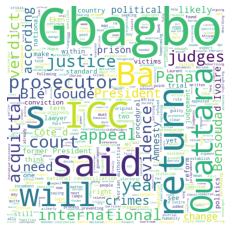

In [90]:
draw_word_cloud(text)

## Quote Detection


In [2]:
!pip install textacy

     |████████████████████████████████| 200 kB 769 kB/s eta 0:00:01
     |████████████████████████████████| 134 kB 4.5 MB/s eta 0:00:01
     |████████████████████████████████| 2.0 MB 6.5 MB/s eta 0:00:01
  Created wheel for jellyfish: filename=jellyfish-0.8.2-cp38-cp38-macosx_10_9_x86_64.whl size=24514 sha256=7954c2197310ef5b44f67e623e6030bd9bfadf01d8072276537b686e7bfc800b
  Stored in directory: /Users/oooyyyzzz/Library/Caches/pip/wheels/dc/f2/ee/514a3c4bd93af451c473dfc24fc5238838e21df77f76f385eb
Successfully built jellyfish


In [28]:
import re
from textacy import preprocessing
from textacy import extract as ex

In [41]:
def get_sentences(text):
    '''
    Returns list of sentences
    '''
    doc = nlp(text)
    sentences = list(doc.sents)
    return sentences


def get_quotes(text):
#     quotes = re.findall(r'“(.*?)“',text) # r'^“.*”$' | 
#     return quotes
    text = preprocessing.normalize.quotation_marks(text)
    doc = nlp(text)
    quotes = ex.direct_quotations(doc)
    return quotes


In [42]:
test_text = 'The Ohangwena region has during the last year witnessed an increase in domestic violence cases, reporting a massive 252 cases, compared to 71 in 2019.\n\nGovernor Walde Ndevashiya said it is disheartening to report that the region’s crime has increased to 4 912 cases reported last year.\n\nPresenting the state of affairs in the region, Ndevashiya said drug dealing cases also increased from 51 to 86, murder cases increased from 24 to 29 while robbery also increased from 96 to 129 cases during the last financial year. He said "quotation tes1." \n\n“The above statistics are worrisome, hence requires all of us to join hands in the fight against these social evils,” said Ndevashiya.\n\nThe governor said crime does not only undermine the developmental agenda in a number of ways, but it also erodes social and human capital and it also forces skilled people to migrate, leaving the region brain drained.\n\nDespite these challenges, the governor said the Namibian Police are committed to the provision of safety and security in terms of creating a conducive working environment for the men and women in uniform.\n\nAs a result, a charge office, cell block, male and female single quarters and married quarters were constructed at Endola police station.\n\nThe police also constructed barracks for male single quarters and quarters for married couples at Eenhana.\n\nA police station was also constructed at Ongha.\n\nIn addition to the crime, the region is faced with a number of social challenges such as unemployment, gender-based violence, income inequalities, housing needs, poor sanitation, road infrastructure and access to potable water.\n\nnashipala@nepc.com.na. He said "quotation test2".'

In [43]:
# sentences = get_sentences(test_text)
# all_quotes = []
# for pos, sentence in enumerate(sentences):
#     quote = get_quotes(str(sentence))
#     if len(quote) > 0:
#            all_quotes.append((pos,quote))
# all_quotes

In [45]:
print(get_quotes(test_text))

<generator object direct_quotations at 0x7fc973cd4430>


In [46]:
!pip install stanfordcorenlp


### Filter:
Date,
Name,
Organizations,
Countries/Regions

### similarity scores



## Features 
number of quotes
Similarity scores
quote sentiment scores

merge tables with uid + url



Others:
publisher
subjectivity
polarity



Codes:
https://github.com/danielgrzenda/un-media-analysis/tree/stephen-branch/src/stage1_pipeline


